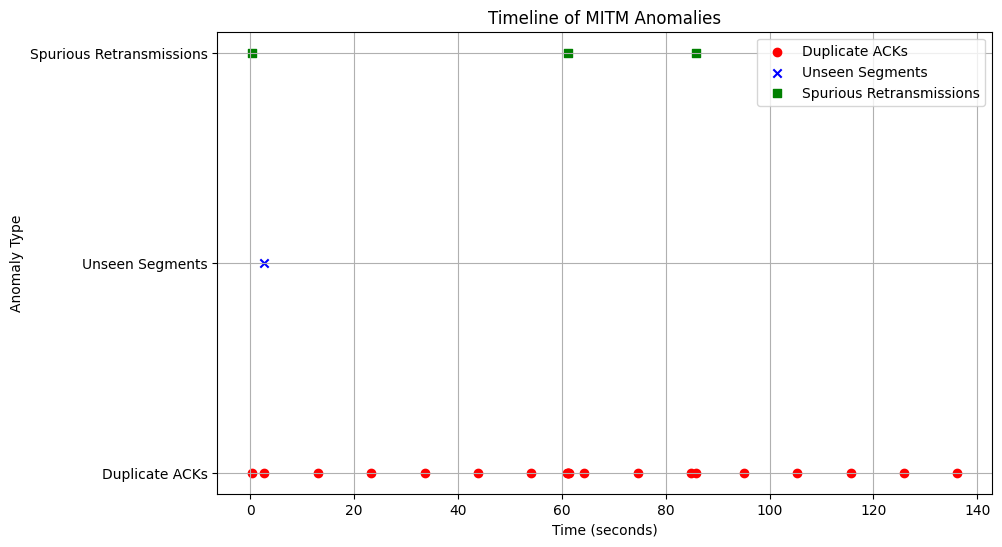

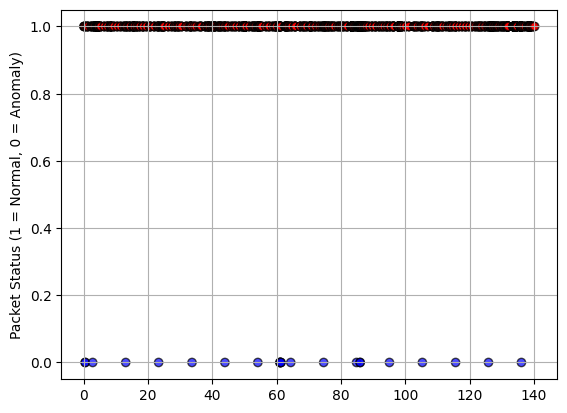

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mitm_attacking_machine.csv')

df.head(10)

# Filter for TCP traffic (since most MITM attacks occur in TCP sessions)
tcp_data = df[df['Protocol'] == 'TCP']

# Detect Duplicate ACKs
duplicate_acks = tcp_data[tcp_data['Info'].str.contains('Dup ACK')]

# Detect Unseen Segments
unseen_segments = tcp_data[tcp_data['Info'].str.contains('unseen segment')]

# Detect Spurious Retransmissions
spurious_retransmissions = tcp_data[tcp_data['Info'].str.contains('Spurious Retransmission')]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Plotting the anomalies over time
plt.figure(figsize=(10, 6))

# Plot Duplicate ACKs
plt.scatter(duplicate_acks['Time'], [1] * len(duplicate_acks), color='red', label='Duplicate ACKs', marker='o')

# Plot Unseen Segments
plt.scatter(unseen_segments['Time'], [2] * len(unseen_segments), color='blue', label='Unseen Segments', marker='x')

# Plot Spurious Retransmissions
plt.scatter(spurious_retransmissions['Time'], [3] * len(spurious_retransmissions), color='green', label='Spurious Retransmissions', marker='s')

# Add labels and legend
plt.title('Timeline of MITM Anomalies')
plt.xlabel('Time (seconds)')
plt.ylabel('Anomaly Type')
plt.yticks([1, 2, 3], ['Duplicate ACKs', 'Unseen Segments', 'Spurious Retransmissions'])
plt.legend()

# Show grid for easier readability
plt.grid(True)

# Show plot
plt.show()

# Add a new 'Status' column and initially set all values to 1 (normal packet)
df['Status'] = 1

# Define anomaly conditions
anomaly_conditions = [
    df['Info'].str.contains('Dup ACK', case=False, na=False),
    df['Info'].str.contains('Spurious Retransmission', case=False, na=False),
    df['Info'].str.contains('unseen segment', case=False, na=False)
]

# Apply conditions to mark anomalies with 0
for condition in anomaly_conditions:
    df.loc[condition, 'Status'] = 0

# Save the updated dataframe back to a CSV file
df.to_csv('updated_file_with_status.csv', index=False)

# Plot the data: Time vs. Status
if 'Status' in df.columns:
    plt.scatter(df['Time'], df['Status'], c=df['Status'], cmap='bwr', alpha=0.7, edgecolor='k')
else:
    print("The 'Status' column does not exist in the DataFrame.")
plt.ylabel('Packet Status (1 = Normal, 0 = Anomaly)')
plt.grid(True)

# Display the plot
plt.show()